In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import lightgbm as lgb
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling

In [29]:
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:50].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    #plt.savefig('lgbm_importances01.png')

In [46]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

## FE

In [47]:
train_df.tail(10)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199990,train_199990,1,14.1475,1.8568,11.0066,3.6779,12.1944,-16.5936,5.3217,14.8508,...,-6.4708,4.7287,1.9034,7.2324,20.6047,1.7170,-4.0032,9.1627,13.8077,-1.9646
199991,train_199991,0,9.9909,2.5523,11.9653,6.3958,13.5497,-9.5293,6.0864,14.1789,...,12.0737,5.2139,0.8094,-0.6585,17.0548,0.5328,-5.3444,8.5414,13.2895,-6.7896
199992,train_199992,0,12.2825,2.6918,15.4684,6.4262,10.9863,9.9659,4.5030,9.9232,...,3.9514,10.9040,1.3472,5.6184,20.5498,-0.2854,7.6252,10.1758,17.4066,-11.5244
199993,train_199993,0,13.2152,-5.8006,9.7260,6.5910,12.4612,-7.1652,6.0666,12.9887,...,3.9357,8.8442,1.8096,-4.8314,22.0050,0.3916,6.7302,8.9709,14.5405,6.1149
199994,train_199994,0,12.3925,-5.8821,11.2323,3.9237,10.4509,10.7262,7.0503,18.6968,...,1.3911,6.8687,3.7788,6.3378,14.4656,-1.4843,-3.9299,9.1164,16.3170,-7.5048
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001
199999,train_199999,0,10.8762,-5.7105,12.1183,8.0328,11.5577,0.3488,5.2839,15.2058,...,8.9842,1.6893,0.1276,0.3766,15.2101,-2.4907,-2.2342,8.1857,12.1284,0.1385


In [48]:
var_list = [f for f in train_df.columns if 'var' in f]

In [64]:
rank_var_list = [f+'_rank' for f in train_df.columns if 'var' in f]
sort_var_list = ['sort_var_' + str(i) for i in range(len(var_list))]

# train_df['mean'] = np.mean(train_df[var_list],axis=1)
# train_df['std'] = np.std(train_df[var_list],axis=1)
# train_df['min'] = np.min(train_df[var_list],axis=1)
# train_df['max'] = np.max(train_df[var_list],axis=1)
# train_df['sum'] = np.sum(train_df[var_list],axis=1)
# train_df['median'] = np.median(train_df[var_list],axis=1)

# train_df[mean_var_list] = (train_df[var_list]-np.median(train_df[var_list],axis=0))/((np.max(train_df[var_list],axis=0)-np.median(train_df[var_list],axis=0)))
# test_df[mean_var_list] = (test_df[var_list]-np.median(test_df[var_list],axis=0))/((np.max(test_df[var_list],axis=0)-np.median(test_df[var_list],axis=0)))


# train_df[rank_var_list] = train_df[var_list].rank(method='average',pct=True)
# test_df[rank_var_list] = test_df[var_list].rank(method='average',pct=True)

# #simple stats on rank cols 
# train_df['mean'] = np.mean(train_df[rank_var_list],axis=1)
# train_df['std'] = np.std(train_df[rank_var_list],axis=1)
# train_df['min'] = np.min(train_df[rank_var_list],axis=1)
# train_df['max'] = np.max(train_df[rank_var_list],axis=1)
# train_df['sum'] = np.sum(train_df[rank_var_list],axis=1)
# train_df['median'] = np.median(train_df[rank_var_list],axis=1)

# train_df['rank_of_rank_mean'] = train_df['mean'].rank(method='average',pct=True)
# train_df['rank_of_rank_std'] = train_df['std'].rank(method='average',pct=True)
# train_df['rank_of_rank_min'] = train_df['min'].rank(method='average',pct=True)
# train_df['rank_of_rank_max'] = train_df['max'].rank(method='average',pct=True)
# train_df['rank_of_rank_sum'] = train_df['sum'].rank(method='average',pct=True)
# train_df['rank_of_rank_median'] = train_df['median'].rank(method='average',pct=True)


# #simple stats on rank cols 
# test_df['mean'] = np.mean(test_df[rank_var_list],axis=1)
# test_df['std'] = np.std(test_df[rank_var_list],axis=1)
# test_df['min'] = np.min(test_df[rank_var_list],axis=1)
# test_df['max'] = np.max(test_df[rank_var_list],axis=1)
# test_df['sum'] = np.sum(test_df[rank_var_list],axis=1)
# test_df['median'] = np.median(test_df[rank_var_list],axis=1)

# test_df['rank_of_rank_mean'] = test_df['mean'].rank(method='average',pct=True)
# test_df['rank_of_rank_std'] = test_df['std'].rank(method='average',pct=True)
# test_df['rank_of_rank_min'] = test_df['min'].rank(method='average',pct=True)
# test_df['rank_of_rank_max'] = test_df['max'].rank(method='average',pct=True)
# test_df['rank_of_rank_sum'] = test_df['sum'].rank(method='average',pct=True)
# test_df['rank_of_rank_median'] = test_df['median'].rank(method='average',pct=True)

# train_df[sort_var_list] = train_df[var_list].rank(method='average',pct=True)
# test_df[rank_var_list] = test_df[var_list].rank(method='average',pct=True)


# value_train = train_df[var_list].values
# value_train.sort(axis=1)
# value_train = pd.DataFrame(value_train, train_df.index, sort_var_list)
# train_df[sort_var_list] = value_train

# value_test = test_df[var_list].values
# value_test.sort(axis=1)
# value_test = pd.DataFrame(value_test, test_df.index, sort_var_list)
# test_df[sort_var_list] = value_test

nlargest = 25
new_col_names = ['top{}'.format(i) for i in range(1, nlargest+1)]
order = np.argsort(-train_df[var_list].values, axis=1)[:, :nlargest]
top_n_train = pd.DataFrame(
                     #test_df[var_list].columns[order],
                      order,
                      columns=new_col_names,
                      index=train_df.index)

train_df[new_col_names] = top_n_train

order = np.argsort(-test_df[var_list].values, axis=1)[:, :nlargest]
top_n_train = pd.DataFrame(
                     #test_df[var_list].columns[order],
                      order,
                      columns=new_col_names,
                      index=train_df.index)

test_df[new_col_names] = top_n_train


nsmallest = 25
new_col_names = ['bottom{}'.format(i) for i in range(1, nsmallest+1)]
order = np.argsort(train_df[var_list].values, axis=1)[:, :nsmallest]
top_n_train = pd.DataFrame(
                     #test_df[var_list].columns[order],
                      order,
                      columns=new_col_names,
                      index=train_df.index)

train_df[new_col_names] = top_n_train
order = np.argsort(test_df[var_list].values, axis=1)[:, :nsmallest]
top_n_train = pd.DataFrame(
                     #test_df[var_list].columns[order],
                      order,
                      columns=new_col_names,
                      index=test_df.index)

test_df[new_col_names] = top_n_train

In [65]:
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,bottom16,bottom17,bottom18,bottom19,bottom20,bottom21,bottom22,bottom23,bottom24,bottom25
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,140,52,72,180,157,128,11,134,61,139
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,127,128,173,26,145,8,178,5,27,147
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,140,167,58,86,100,185,118,180,11,173
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,52,157,138,35,72,27,1,128,10,95
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,117,167,196,32,138,141,11,171,27,47


## Model

In [66]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

n_folds = 5
random_seed = 26
model = 'index of top and bottom 25'


model_name = "{0}_{1}_folds".format(model, n_folds)
print("Model: {}".format(model_name))

Model: index of top and bottom 25_5_folds


In [72]:
#feats = train_df.iloc[:,2:].columns.tolist();feats

#exclusion = ['ID_code', 'target']+ rank_var_list
exclusion = ['ID_code', 'target'] + sort_var_list

feats = [c for c in train_df.columns if c not in exclusion];feats

cat_feats = [c for c in feats if c not in var_list]

In [73]:
cat_feats

['top1',
 'top2',
 'top3',
 'top4',
 'top5',
 'top6',
 'top7',
 'top8',
 'top9',
 'top10',
 'top11',
 'top12',
 'top13',
 'top14',
 'top15',
 'top16',
 'top17',
 'top18',
 'top19',
 'top20',
 'top21',
 'top22',
 'top23',
 'top24',
 'top25',
 'bottom1',
 'bottom2',
 'bottom3',
 'bottom4',
 'bottom5',
 'bottom6',
 'bottom7',
 'bottom8',
 'bottom9',
 'bottom10',
 'bottom11',
 'bottom12',
 'bottom13',
 'bottom14',
 'bottom15',
 'bottom16',
 'bottom17',
 'bottom18',
 'bottom19',
 'bottom20',
 'bottom21',
 'bottom22',
 'bottom23',
 'bottom24',
 'bottom25']

Current Fold: 1


C:\Users\TanQ\AppData\Local\Continuum\anaconda3\envs\work\lib\site-packages\lightgbm\basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\TanQ\AppData\Local\Continuum\anaconda3\envs\work\lib\site-packages\lightgbm\basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


AUC = 0.8606445966991148
getting feature importance
Current Fold: 2


C:\Users\TanQ\AppData\Local\Continuum\anaconda3\envs\work\lib\site-packages\lightgbm\basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\TanQ\AppData\Local\Continuum\anaconda3\envs\work\lib\site-packages\lightgbm\basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


AUC = 0.8562808577384886
getting feature importance
Current Fold: 3


C:\Users\TanQ\AppData\Local\Continuum\anaconda3\envs\work\lib\site-packages\lightgbm\basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\TanQ\AppData\Local\Continuum\anaconda3\envs\work\lib\site-packages\lightgbm\basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


AUC = 0.8666007372807999
getting feature importance
Current Fold: 4


C:\Users\TanQ\AppData\Local\Continuum\anaconda3\envs\work\lib\site-packages\lightgbm\basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\TanQ\AppData\Local\Continuum\anaconda3\envs\work\lib\site-packages\lightgbm\basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


AUC = 0.8634803679188667
getting feature importance
Current Fold: 5


C:\Users\TanQ\AppData\Local\Continuum\anaconda3\envs\work\lib\site-packages\lightgbm\basic.py:1184: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\TanQ\AppData\Local\Continuum\anaconda3\envs\work\lib\site-packages\lightgbm\basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


AUC = 0.8615874692486952
getting feature importance
Overall AUC = 0.8597064708771092
Saving submission file


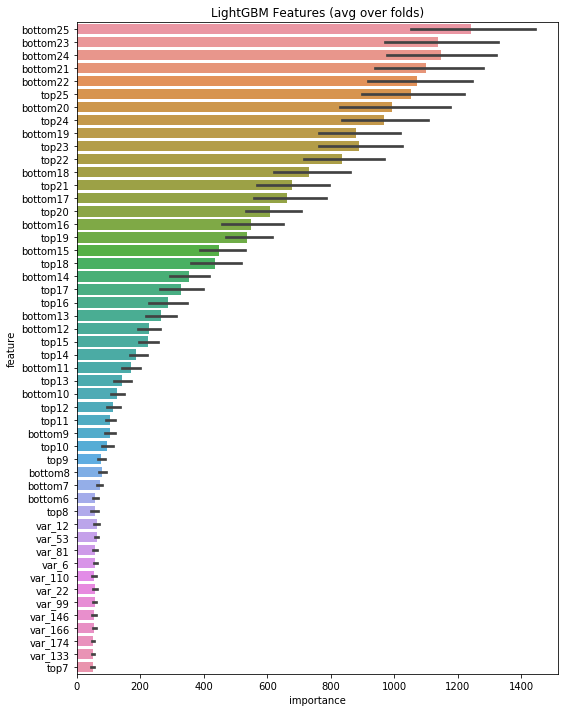

In [74]:
clfs = []
folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=random_seed)
oof_preds = np.zeros((len(train_df), 1))
test_preds = np.zeros((len(test_df), 1))


X = train_df[feats]
y = train_df['target']
X_test = test_df[feats]
test_ids = test_df.ID_code.values


parameters = {
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    #'scale_pos_weight': 400,
    #'device' : 'gpu' ,
    'boosting': 'gbdt',
    'num_leaves': 31, #31
    'feature_fraction': 0.5,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'learning_rate': 0.05, #0.05
    'verbose': 30
    #'min_data_in_leaf': 200
}

feature_importance_df = pd.DataFrame()
for fold_, (trn_, val_) in enumerate(folds.split(X, y)):
    print("Current Fold: {}".format(fold_+1))
    trn_x, trn_y = X.iloc[trn_, :], y[trn_]
    val_x, val_y = X.iloc[val_, :], y[val_]


    trn_lgb = lgb.Dataset(trn_x, trn_y, categorical_feature=cat_feats)
    val_lgb = lgb.Dataset(val_x, val_y, categorical_feature=cat_feats)
    clf = lgb.train(parameters,
                     train_set=trn_lgb,
                     #valid_sets=[valid_data_lgb,holdout_data_lgb],
                     valid_sets=[trn_lgb, val_lgb],
                     num_boost_round=3000,
                     early_stopping_rounds=50,
                     verbose_eval=False)
    


    val_pred = clf.predict(val_x)
    test_fold_pred = clf.predict(X_test)

    print("AUC = {}".format(roc_auc_score(val_y, val_pred)))
    oof_preds[val_, :] = val_pred.reshape((-1, 1))
    test_preds += test_fold_pred.reshape((-1, 1))
    
    print('getting feature importance')
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = feats
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    
test_preds /= n_folds
roc_score = roc_auc_score(y, oof_preds.ravel())
print("Overall AUC = {}".format(roc_score))


print("Saving submission file")
sample = pd.read_csv('../data/sample_submission.csv')
sample.target = test_preds.astype(float)
sample.ID_code = test_ids
sample.to_csv('../submissions/{}_{}.csv'.format(model_name,str(roc_score)), index=False)

display_importances(feature_importance_df)


In [70]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH = '" + nb.base_url + nb.notebook_path + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [71]:


shutil.copyfile(os.path.basename(NOTEBOOK_FULL_PATH), 
                             '../models/{}_{}.ipynb'.format(model_name, str(roc_score)))


'../models/index of top and bottom 25_5_folds_0.8928948909645027.ipynb'